<a href="https://colab.research.google.com/github/XinyaoT/pytorch-deep-learning/blob/main/mynotes/pytorch_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import zipfile
from pathlib import Path

with open("data/pizza_steak_sushi.zip","wb") as f:
  request = requests.get("https://")
  print("download")
  f.write(requests.content)




FileNotFoundError: [Errno 2] No such file or directory: 'data/pizza_steak_sushi.zip'

In [ ]:
import requests
import zipfile
from pathlib import Path
with zipfile.ZipFile("data/pizza_steak_sushi.zip") as zip_ref:
  print("unzip")
  zip_ref.extractall("data/pizza_steak_sushi")

unzip


In [ ]:
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch import nn
import matplotlib.pyplot as plt
# transforms 对图片进行变换 compose串联操作
data_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

torch.Size([64, 64, 3])
torch.Size([64, 64, 3])
torch.Size([64, 64, 3])


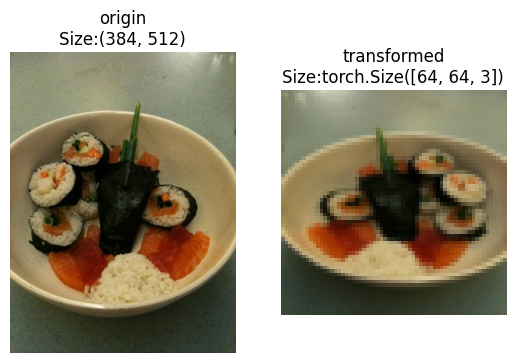

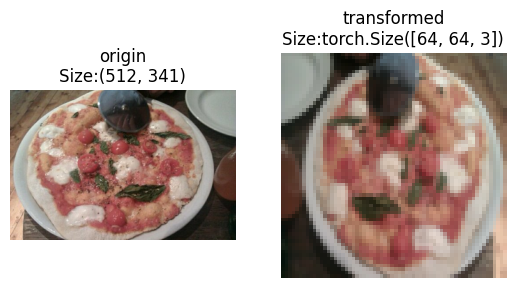

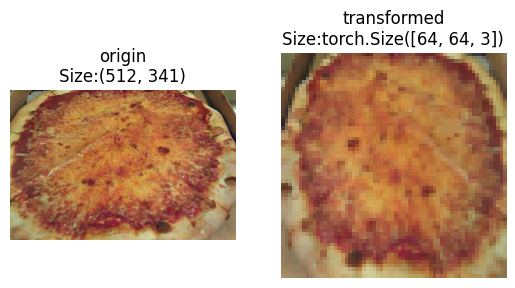

In [ ]:
import random
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
def plot_transforms_images(imagepath:list,transform,n = 3,seed = None):
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(imagepath,k = n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig,ax = plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f"origin\nSize:{f.size}")
      ax[0].axis(False)
      # 注意PIL转成tensor，需要permute
      transformed_image = transform(f).permute(1,2,0)
      print(transformed_image.shape)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"transformed\nSize:{transformed_image.shape}")
      ax[1].axis(False)
image_path_list = list(Path("data/pizza_steak_sushi").glob("*/*/*.jpg"))
# image_path_list
plot_transforms_images(image_path_list,transform = data_transform,n = 3)


## torchvision 的 datasets.ImageFolder会加载对应格式数据集


In [ ]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from pathlib import Path
# ImageFolder 会自动读取这种文件夹结构并为每张图像分配一个对应的标签（class1 为 0，class2 为 1，依此类推）。
train_dir = Path("data/pizza_steak_sushi/train")
test_dir = Path("data/pizza_steak_sushi/test")
train_data = datasets.ImageFolder(root = train_dir,transform = data_transform,target_transform = None,is_valid_file = None)
test_data = datasets.ImageFolder(root = test_dir,transform = data_transform,target_transform = None,is_valid_file = None)

In [ ]:
train_data[0]
print(train_data.classes)
print(train_data.class_to_idx)
print(train_data.targets)

['pizza', 'steak', 'sushi']
{'pizza': 0, 'steak': 1, 'sushi': 2}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


##dataloader

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset = train_data,batch_size = 32,shuffle = True)
test_dataloader = DataLoader(dataset = test_data,batch_size = 32,shuffle = False)

In [ ]:
img,label = next(iter(train_dataloader))
print(img.shape)
print(label.shape)

##重写datasets

In [ ]:
import os
# help function
# setup path for target dir
target_dir =train_dir
print(target_dir)
# get classname
class_names = sorted(entry.name for entry in list(os.scandir(target_dir)) if entry.is_dir())
print(class_names)

data/pizza_steak_sushi/train
['pizza', 'steak', 'sushi']


In [ ]:
# python 返回多个值可用单个元组接受，或者分别接受
# enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
#  seasons = ['Spring', 'Summer', 'Fall', 'Winter']
# >>> list(enumerate(seasons))
# [(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]
# >>> list(enumerate(seasons, start=1))       # 下标从 1 开始
# [(1, 'Spring'), (2, 'Summer'), (3, 'Fall'), (4, 'Winter')]
def find_class(dictory:str):
  class_names = sorted(entry.name for entry in list(os.scandir(target_dir)) if entry.is_dir())
  if not class_names:
    raise FileNotFoundError(f"Couldn't find any class folder in {target_dir}.")
  class_to_idx = {class_name:i for i,class_name in enumerate(class_names)}
  return class_names,class_to_idx


In [ ]:
find_class(target_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

##补充：生成器表达式

`numbers = [1, 2, 3, 4, 5]`
`# 使用生成器表达式计算每个数字的平方`
`squares = (x**2 for x in numbers)`
`# 打印每个平方`
`for square in squares:`
    `print(square)`
https://blog.csdn.net/be5yond/article/details/119344030
###可迭代对象和迭代器
* Python 中任意的对象，只要它定义了可以返回一个迭代器的__iter__方法，或者定义了可以支持下标索引的__getitem__方法，那么它就是一个可迭代对象(如: tuple, list, dict)
* 可以使用关键字iter() 将一个Iterable对象转换成迭代器.
* 若对象中实现了 getitem 或者 iter 方法，那么这个对象就是可迭代对象。若对象中实现了 next 和 iter 方法，那么这个对象就是迭代器。
##补充：列表推导式
`[表达式 for 迭代变量 in 可迭代对象 [if 条件表达式] ]
`
https://blog.csdn.net/qq_32727095/article/details/118959610

##dataset的目的
* 重写getitem方法和len方法
* getitem 要满足给下标，去元素

In [ ]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from pathlib import Path

class ImageFolderCustom(Dataset):
  # ini
  def __init__(self,targ_dir:str,transform = None) -> None:
    self.paths = list(Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes,self.class_to_idx = find_class(targ_dir)

  def load_image(self,index:int)->Image.Image:

    image_path = self.paths[index]
    return Image.open(image_path)
  def __len__(self):
    return len(self.paths)
  def __getitem__(self,index:int):
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]
    if self.transform:
      return self.transform(img),class_idx
    else:
      return img,class_idx

In [ ]:
# create transform
train_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

In [ ]:
# test our dataset
train_data = ImageFolderCustom(targ_dir = train_dir,transform = train_transform)
test_data = ImageFolderCustom(targ_dir = test_dir,transform = test_transform)

In [ ]:
train_data[0]

(tensor([[[0.0549, 0.0627, 0.0706,  ..., 0.0196, 0.0118, 0.0118],
          [0.0314, 0.0392, 0.0431,  ..., 0.1373, 0.1255, 0.1098],
          [0.0157, 0.0157, 0.0157,  ..., 0.1725, 0.1765, 0.1725],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0157, 0.0353,  ..., 0.0000, 0.0000, 0.0000],
          [0.0157, 0.1294, 0.0902,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.0039,  ..., 0.0353, 0.0314, 0.0314],
          [0.0000, 0.0000, 0.0000,  ..., 0.0431, 0.0510, 0.0588],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0118, 0.0235,  ..., 0.0000, 0.0000, 0.0000],
          [0.0118, 0.1137, 0.0745,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0039, 0.0039,  ..., 0.0078, 0.0039, 0.0118],
          [0.0039, 0.0039, 0.0039,  ..., 0.0118, 0.0078, 0.0118],
          [0.0039, 0.0039, 0.0000,  ...,

In [ ]:
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# display random funtions
import torch
def display_random_images_and_labels(dataset,n = 10,display_shape= False,seed = None):
  if n >10:
    n = 10
    display_shape = False
    print(f"n should <10")
  if seed:
    random.seed(seed)
# some random sample
  random_index = random.sample(range(len(dataset)),k = n)
  # 对应index的image
  plt.figure(figsize = (16,8))
  for i,target_index in enumerate(random_index):
    img,label = dataset[target_index]
    tar_image_adjust = img.permute(1,2,0)
    plt.subplot(1,n,i+1)
    plt.imshow(tar_image_adjust)
    plt.title(label,fontsize = 30)
    plt.axis("off")


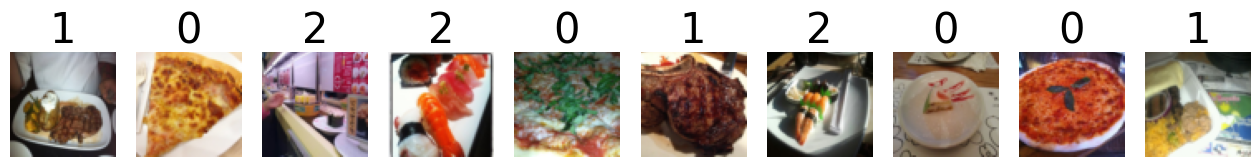

In [ ]:
display_random_images_and_labels(train_data)

##重写dataloader

In [ ]:
from torch.utils.data import DataLoader
batch_size = 32
train_dataloader = DataLoader(dataset = train_data,batch_size = batch_size,shuffle = True)
test_dataloader = DataLoader(dataset = test_data,batch_size = batch_size,shuffle = False)
train_dataloader


In [ ]:
# dataloader是一个迭代器!!!!!!!
img,label = next(iter(train_dataloader))
print(img.shape)
print(label.shape)

torch.Size([32, 3, 64, 64])
torch.Size([32])


##一些其他的数据增强方式

In [ ]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
train_transforms = transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])


tiny VGG


In [ ]:
from torchvision import datasets
import os
# 1. load transform data
train_transforms = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])
test_transforms = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

train_data_sample = datasets.ImageFolder(root = train_dir,transform = train_transforms)
test_data_sample = datasets.ImageFolder(root = test_dir,transform = test_transforms)
#2. dataloader
batch_size = 32
Num_workers =os.cpu_count()
train_dataloader_sample = DataLoader(dataset = train_data_sample,batch_size = 32,shuffle = True)
test_dataloader_sample = DataLoader(dataset = test_data_sample,batch_size = 32,shuffle = False)

In [61]:
class TinyVGG(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
              out_channels = hidden_units,
              kernel_size = 3,
              stride = 1,
              padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
              out_channels = hidden_units,
              kernel_size = 3,
              stride = 1,
              padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,stride = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
              out_channels = hidden_units,
              kernel_size = 3,
              stride = 1,
              padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
              out_channels = hidden_units,
              kernel_size = 3,
              stride = 1,
              padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,stride = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*13*13,out_features = output_shape)
    )
  def forward(self,x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

In [62]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape = 3,hidden_units = 10,output_shape = 2)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=2, bias=True)
  )
)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_0.to(device)

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=2, bias=True)
  )
)

In [ ]:
image_batch,label_batch = next(iter(train_dataloader_sample))
image_batch.shape,label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
model_0(image_batch.to(device))

torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])


tensor([[0.0078, 0.0061],
        [0.0092, 0.0060],
        [0.0064, 0.0082],
        [0.0071, 0.0085],
        [0.0091, 0.0086],
        [0.0064, 0.0093],
        [0.0080, 0.0045],
        [0.0085, 0.0067],
        [0.0108, 0.0062],
        [0.0072, 0.0116],
        [0.0075, 0.0045],
        [0.0108, 0.0094],
        [0.0090, 0.0115],
        [0.0065, 0.0089],
        [0.0062, 0.0066],
        [0.0077, 0.0059],
        [0.0047, 0.0082],
        [0.0084, 0.0083],
        [0.0077, 0.0062],
        [0.0078, 0.0078],
        [0.0077, 0.0118],
        [0.0062, 0.0076],
        [0.0100, 0.0055],
        [0.0079, 0.0092],
        [0.0047, 0.0114],
        [0.0026, 0.0126],
        [0.0074, 0.0064],
        [0.0046, 0.0095],
        [0.0037, 0.0090],
        [0.0060, 0.0109],
        [0.0061, 0.0045],
        [0.0057, 0.0062]], grad_fn=<AddmmBackward0>)

##torchinfo


In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary
summary(model_0,input_size = [32,3,64,64])

torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 2]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU: 2-9                         [32, 10, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

### TRAIN TEST  loops


In [64]:
def train_step(model:nn.Module,dataloader:DataLoader,loss_fn:nn.Module,optimizer:torch.optim,device:torch.device):
  model.train()
  train_loss,train_acc = 0,0
  for batch,(X,y) in enumerate(dataloader):
    X,y = X.to(device),y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_class = torch.argmax(torch.softmax(y_pred,dim = 1),dim = 1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)
  # adjust
  train_loss = train_loss/len(dataloader)
  train_acc = train_acc/len(dataloader)
  return train_loss,train_acc

In [65]:
def test_step(model:nn.Module,dataloader:DataLoader,loss_fn:nn.Module,device:torch.device):
  model.eval()
  test_loss,test_acc = 0,0
  with torch.inference_mode():
    for batch,(X,y) in enumerate(dataloader):
      X,y = X.to(device),y.to(device)
      test_pred_logits = model_0(X)
      loss = loss_fn(test_pred_logits,y)
      test_loss += loss.item()

      test_pred_labels = torch.argmax(torch.softmax(test_pred_logits,dim = 1),dim = 1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
  test_loss = test_loss/len(dataloader)
  test_acc = test_acc/len(dataloader)
  return test_loss,test_acc

In [66]:
def train(model:nn.Module,train_dataloader:DataLoader,test_dataloader:DataLoader,optimizer:torch.optim,loss_fn:nn.Module,epochs:int,device:torch.device):
  results = {"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]}
  for epoch in range(epochs):
    train_loss,train_acc = train_step(model = model,dataloader = train_dataloader,loss_fn = loss_fn,optimizer = optimizer,device = device)
    test_loss,test_acc = test_step(model=model,dataloader=test_dataloader,loss_fn=loss_fn,device = device)
    print(f"epoch:{epoch}|Train_loss:{train_loss}|train_acc:{train_acc}|test_loss{test_loss}|test_acc:{test_acc}")
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
  return results

##train evaluate model_0

In [67]:
torch.manual_seed(42)
optimizer = torch.optim.Adam(params = model_0.parameters(),lr = 0.001)
loss_fn = nn.CrossEntropyLoss()
epochs = 5
model_0 = TinyVGG(input_shape = 3,hidden_units = 10,output_shape = len(train_data.classes)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),lr = 0.001)
results = train(model = model_0,train_dataloader = train_dataloader_sample,test_dataloader = test_dataloader_sample,optimizer = optimizer,loss_fn = loss_fn,epochs = epochs,device = device)

epoch:0|Train_loss:1.106339156627655|train_acc:0.3125|test_loss1.098793625831604|test_acc:0.23958333333333334
epoch:1|Train_loss:1.104242518544197|train_acc:0.30078125|test_loss1.0624013145764668|test_acc:0.5416666666666666
epoch:2|Train_loss:1.1061792522668839|train_acc:0.26953125|test_loss1.0816359122594197|test_acc:0.2708333333333333
epoch:3|Train_loss:1.086075708270073|train_acc:0.4375|test_loss1.1034474770228069|test_acc:0.28125
epoch:4|Train_loss:1.0555275827646255|train_acc:0.49609375|test_loss1.0427254835764568|test_acc:0.4431818181818182


In [68]:
def plot_loss_curves(results):
  loss = results["train_loss"]
  test_loss = results["test_loss"]
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]
  epochs = range(len(results["train_loss"]))
  plt.figure(figsize = (15,7))
  plt.subplot(1,2,1)
  plt.plot(epochs,loss,label = "train_loss")
  plt.plot(epochs,test_loss,label = "test_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  # acc
  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label = "train_accuracy")
  plt.plot(epochs,test_accuracy,label = "test_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

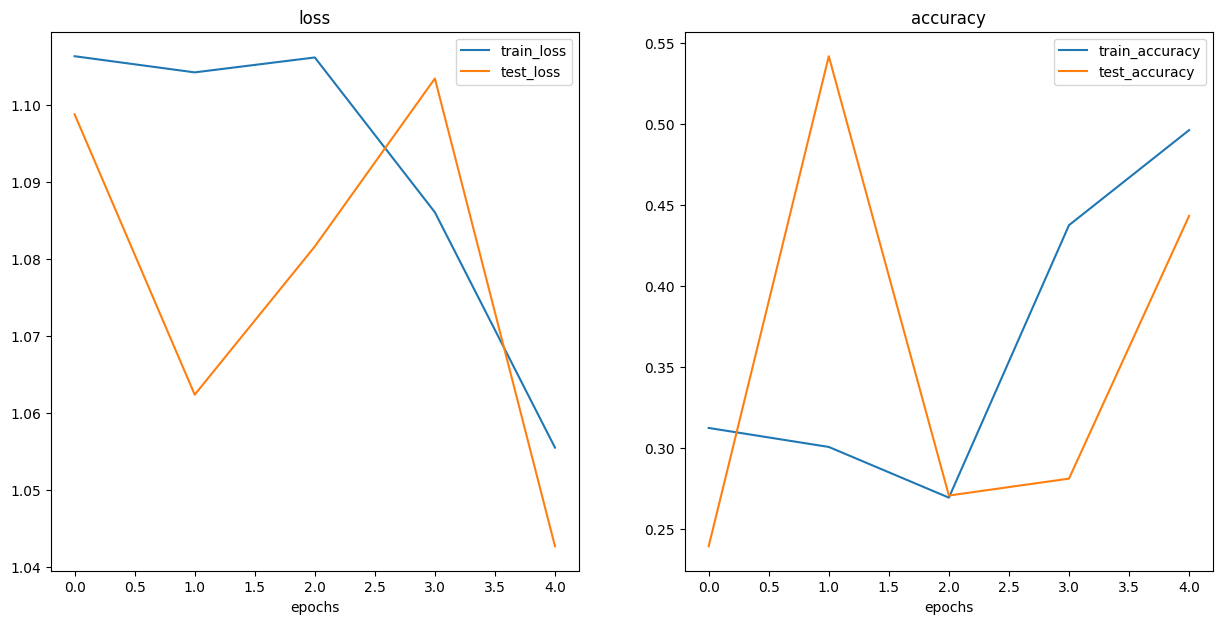

In [69]:
plot_loss_curves(results)

###model_1 data argu

In [70]:
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform_sample = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

In [71]:

# datasets
train_data_sample = datasets.ImageFolder(root = train_dir,transform = train_transform_trivial)
test_data_sample = datasets.ImageFolder(root = test_dir,transform = test_transform_sample)

In [72]:
import os
batch_size = 32
num_workers = os.cpu_count()
train_dataloader_sample = DataLoader(dataset = train_data_sample,batch_size = batch_size,shuffle = True)
test_dataloader_sample = DataLoader(dataset = test_data_sample,batch_size = batch_size,shuffle = False)

In [73]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape = 3,hidden_units = 10,output_shape = len(train_data.classes)).to(device)

In [74]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(),lr = 0.001)
epochs = 5

# timer
from timeit import default_timer as timer
start_time = timer()
model_1_results = train(model = model_1,train_dataloader = train_dataloader_sample,test_dataloader = test_dataloader_sample,optimizer = optimizer,loss_fn = loss_fn,epochs = epochs,device = device)
end_time = timer()
print(f"time:{end_time - start_time}")

epoch:0|Train_loss:1.106883630156517|train_acc:0.30859375|test_loss1.0427254835764568|test_acc:0.4431818181818182
epoch:1|Train_loss:1.0872656777501106|train_acc:0.41015625|test_loss1.0427254835764568|test_acc:0.4431818181818182
epoch:2|Train_loss:1.127316877245903|train_acc:0.28125|test_loss1.0427254835764568|test_acc:0.4431818181818182
epoch:3|Train_loss:1.0990343242883682|train_acc:0.29296875|test_loss1.0427254835764568|test_acc:0.4431818181818182
epoch:4|Train_loss:1.112106204032898|train_acc:0.3515625|test_loss1.0427254835764568|test_acc:0.4431818181818182
time:11.355464125999788


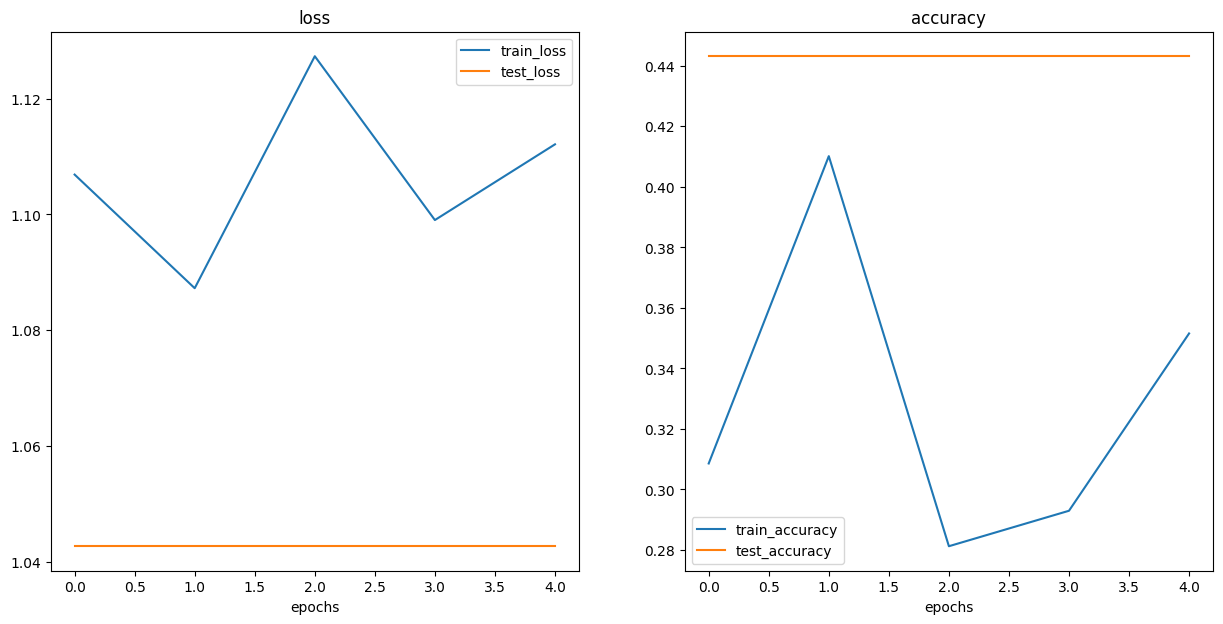

In [75]:
plot_loss_curves(model_1_results)